In [ ]:
import random 
import numpy as np 
import pandas as pd
from pandas import plotting
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')
 
%matplotlib inline

## **Import Datasets**

In [ ]:
data=pd.read_csv('menu.csv')
df=data.copy()

In [ ]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
df.describe(include="all")

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,Small French Fries,16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [ ]:
# Missing values
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

## **a. How many calories does the average McDonald's value meal contain ?**

In [ ]:
a=df.iloc[0:103,:].groupby("Category").Calories.mean().round(2)
a

Category
Beef & Pork       494.00
Breakfast         526.67
Chicken & Fish    552.96
Salads            270.00
Snacks & Sides    245.77
Name: Calories, dtype: float64

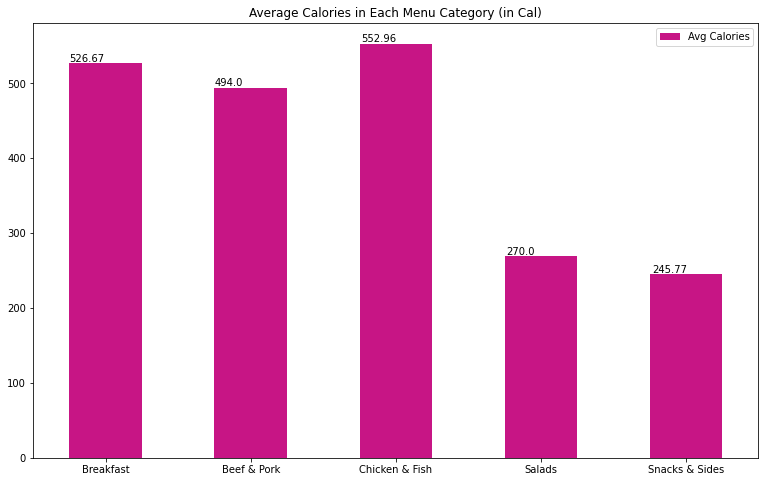

In [ ]:
# Define dataframes for each category
brkf = df.loc[df.Category == 'Breakfast']
bnp = df.loc[df.Category == 'Beef & Pork']
cnf = df.loc[df.Category == 'Chicken & Fish']
sld = df.loc[df.Category == 'Salads']
snass = df.loc[df.Category == 'Snacks & Sides']

# Average calories on each categories
avg_cat = [round(brkf['Calories'].mean(), 2), round(bnp['Calories'].mean(), 2), round(cnf['Calories'].mean(), 2),
          round(sld['Calories'].mean(), 2), round(snass['Calories'].mean(), 2)]
index = ['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads', 'Snacks & Sides']
avg_calat= pd.DataFrame({'Avg Calories': avg_cat}, index=index)
ax = avg_calat.plot.bar(rot=0, color='mediumvioletred', figsize=(13,8), 
                       title='Average Calories in Each Menu Category (in Cal)', legend=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

## **b. How much do beverages, like soda or coffee, contribute to the overall caloric intake?**

In [ ]:
# Define Dataframes for Soda
soda = df.iloc[111:130]

# Generally, the recommended daily calorie intake is 2,000 calories a day for women and 2,500 for men
# Get caloric intake contribution from Soda
cal_soda = pd.DataFrame({'Item': soda.Item, 'Calories': soda.Calories})
cal_soda['Men'] = cal_soda.Calories/2500
cal_soda['Women'] = cal_soda.Calories/2000
cal_soda.head()

,Item,Calories,Men,Women
111,Coca-Cola Classic (Medium),200,0.080,0.10
112,Coca-Cola Classic (Large),280,0.112,0.14
113,Coca-Cola Classic (Child),100,0.040,0.05
114,Diet Coke (Small),0,0.000,0.00
115,Diet Coke (Medium),0,0.000,0.00


In [ ]:
# Average Calories in Soda
avg_soda = soda['Calories'].mean()
print("Average calories of Soda is", round(avg_soda, 2))

avg_soda = pd.to_numeric(avg_soda) 
soda_men = avg_soda/2500
print("Averagely Soda contributes to men's calories intake for ", round(soda_men,2))

soda_women = avg_soda/2000
print("Averagely Soda contributes to women's calories intake for ", round(soda_women, 2))

Average calories of Soda is 105.26
Averagely Soda contributes to men's calories intake for  0.04
Averagely Soda contributes to women's calories intake for  0.05


##**c. Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?**

In [ ]:
# Compare the average amount of Calories on both categories
# Get the average of Calories on Crispy Chicken category
crispy = df[df['Item'].str.contains('Crispy Chicken')]
avg_crispy_cal = crispy.Calories.mean()
print("Average calories on Crispy Chicken Category is ", avg_crispy_cal, "Cal.")

# Get the average of Calories on Grilled Chicken category
grilled = df[df['Item'].str.contains('Grilled Chicken')]
avg_grilled_cal = round(grilled.Calories.mean(), 2)
print("Average calories on Grilled Chicken Category is ", avg_grilled_cal, "Cal.")

Average calories on Crispy Chicken Category is  520.0 Cal.
Average calories on Grilled Chicken Category is  386.92 Cal.


Text(0.5, 1.0, 'Comparison of Crispy vs Grilled on calories')

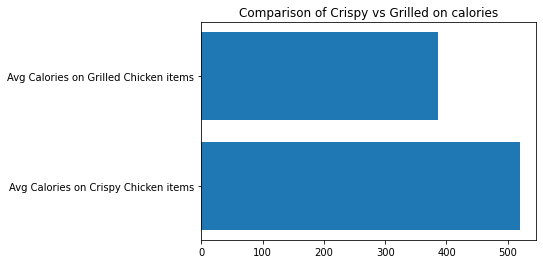

In [ ]:
# Get visual comparison of Crispy vs Grilled on calories
plt.barh(['Avg Calories on Crispy Chicken items', 'Avg Calories on Grilled Chicken items'], 
         [avg_crispy_cal, avg_grilled_cal])
plt.title("Comparison of Crispy vs Grilled on calories")

In [ ]:
# Compare the average amount of sodium and cholesterol on both categories
# Get the average of sodium and cholesterol amount in Crispy Chicken category
avg_crispy_sod = round(crispy.Sodium.mean(), 2)
avg_crispy_ch = round(crispy.Cholesterol.mean(), 2)
print("The average amount of sodium in Crispy Chicken category is ", avg_crispy_sod, 
      "mg, while the average amount of cholesterol is ", avg_crispy_ch, "mg.")

# Get the average of sodium and cholesterol amount in Grilled Chicken category
avg_grilled_sod = round(grilled.Sodium.mean(), 2)
avg_grilled_ch = round(grilled.Cholesterol.mean(), 2)
print("The average amount of sodium in Grilled Chicken category is ", avg_grilled_sod, 
      "mg, while the average amount of cholesterol is ", avg_grilled_ch, "mg.")

The average amount of sodium in Crispy Chicken category is  1148.57 mg, while the average amount of cholesterol is  58.21 mg.
The average amount of sodium in Grilled Chicken category is  1019.23 mg, while the average amount of cholesterol is  75.0 mg.


Text(0.5, 1.0, 'Comparison of Crispy vs Grilled on Sodium and Cholesterol')

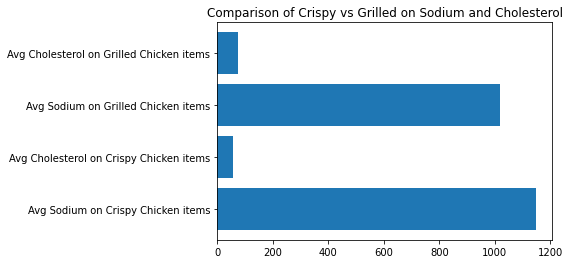

In [ ]:
# Get visual comparison of Crispy vs Grilled on Sodium and Cholesterol
plt.barh(['Avg Sodium on Crispy Chicken items', 'Avg Cholesterol on Crispy Chicken items', 
          'Avg Sodium on Grilled Chicken items', 'Avg Cholesterol on Grilled Chicken items'], 
         [avg_crispy_sod, avg_crispy_ch, avg_grilled_sod, avg_grilled_ch])
plt.title("Comparison of Crispy vs Grilled on Sodium and Cholesterol")

In [ ]:
# Compare the average amount of sugars, dietary fiber, and protein on both categories
# Get the average of sugars and dietary fiber amount in Crispy Chicken category
avg_crispy_sug = round(crispy.Sugars.mean(), 2)
avg_crispy_df = round(crispy['Dietary Fiber'].mean(), 2)
print("The average amount of sugars in Crispy Chicken category is ", avg_crispy_sug, 
      "g, while the average amount of dietary fiber is ", avg_crispy_df, "g.")

# Get the average of sugars and dietary fiber amount in Grilled Chicken category
avg_grilled_sug = round(grilled.Sugars.mean(), 2)
avg_grilled_df = round(grilled['Dietary Fiber'].mean(), 2)
print("The average amount of sugars in Grilled Chicken category is ", avg_grilled_sug, 
      "g, while the average amount of dietary fiber is ", avg_grilled_df, "g.")

# Get the average of Protein in Crispy Chicken category
crispy_fcp = pd.DataFrame({'Item': crispy.Item,
                           'Protein': crispy['Protein']})
avg_crispy_pro = round(crispy_fcp['Protein'].mean(), 2)
print("The average amount of Protein respectively in Crispy Chicken category is ", avg_crispy_pro, "g.")

# Get the average of Protein in Crispy Chicken category
grilled_fcp = pd.DataFrame({'Item': grilled.Item,'Protein': grilled['Protein']})
avg_grilled_pro = round(grilled_fcp['Protein'].mean(), 2)
print("The average amount of protein respectively in Grilled Chicken category is ", avg_grilled_pro, "g.")

The average amount of sugars in Crispy Chicken category is  9.07 g, while the average amount of dietary fiber is  2.93 g.
The average amount of sugars in Grilled Chicken category is  7.62 g, while the average amount of dietary fiber is  3.0 g.
The average amount of Protein respectively in Crispy Chicken category is  24.93 g.
The average amount of protein respectively in Grilled Chicken category is  28.62 g.


Text(0.5, 1.0, 'Comparison of Crispy vs Grilled on sugars, dietary fiber, and protein')

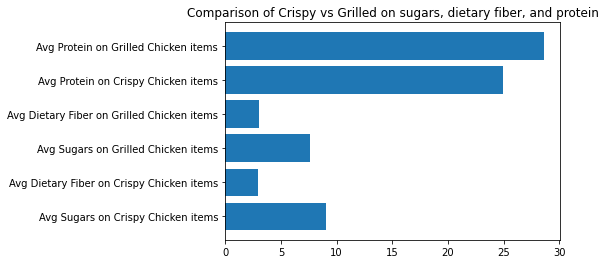

In [ ]:
# Get visual comparison of Crispy vs Grilled on sugars, dietary fiber, and protein
plt.barh(['Avg Sugars on Crispy Chicken items', 'Avg Dietary Fiber on Crispy Chicken items',
          'Avg Sugars on Grilled Chicken items', 'Avg Dietary Fiber on Grilled Chicken items',
          'Avg Protein on Crispy Chicken items','Avg Protein on Grilled Chicken items'], 
         [avg_crispy_sug, avg_crispy_df, avg_grilled_sug, avg_grilled_df,avg_crispy_pro, avg_grilled_pro])
plt.title("Comparison of Crispy vs Grilled on sugars, dietary fiber, and protein")

In [ ]:
# Compare the average amount of vitamins and minerals on both categories
# Get the average of vitamins, minerals, fat and Carbohydrates in Crispy Chicken category
crispy_vm = pd.DataFrame({'Item': crispy.Item, 'Vit A': crispy['Vitamin A (% Daily Value)'], 
                          'Vit C': crispy['Vitamin C (% Daily Value)'], 'Calcium': crispy['Calcium (% Daily Value)'],
                          'Iron': crispy['Iron (% Daily Value)'],'Total Fat': crispy['Total Fat (% Daily Value)'], 
                          'Carbohydrates': crispy['Carbohydrates (% Daily Value)']})
avg_crispy_vita = round(crispy_vm['Vit A'].mean(), 2)
avg_crispy_vitc = round(crispy_vm['Vit C'].mean(), 2)
avg_crispy_calc = round(crispy_vm['Calcium'].mean(), 2)
avg_crispy_iron = round(crispy_vm['Iron'].mean(), 2)
avg_crispy_fat = round(crispy_vm['Total Fat'].mean(), 2)
avg_crispy_carb = round(crispy_vm['Carbohydrates'].mean(), 2)
print("The average amount of Vit A, Vit C, Calcium, Iron, Fat  and Carbohydrates respectively in Crispy Chicken category is ", 
      avg_crispy_vita, "%DV,", avg_crispy_vitc, "%DV,", avg_crispy_calc, "%DV, and", avg_crispy_iron, "%DV",avg_crispy_fat, "%DV, and", avg_crispy_carb, "%DV.")

# Get the average of vitamins and minerals in Grilled Chicken category
grilled_vm = pd.DataFrame({'Item': grilled.Item, 'Vit A': grilled['Vitamin A (% Daily Value)'], 
                           'Vit C': grilled['Vitamin C (% Daily Value)'], 'Calcium': grilled['Calcium (% Daily Value)'],
                           'Iron': grilled['Iron (% Daily Value)'],'Total Fat': grilled['Total Fat (% Daily Value)'], 
                           'Carbohydrates': grilled['Carbohydrates (% Daily Value)']})
avg_grilled_vita = round(grilled_vm['Vit A'].mean(), 2)
avg_grilled_vitc = round(grilled_vm['Vit C'].mean(), 2)
avg_grilled_calc = round(grilled_vm['Calcium'].mean(), 2)
avg_grilled_iron = round(grilled_vm['Iron'].mean(), 2)
avg_grilled_fat = round(grilled_vm['Total Fat'].mean(), 2)
avg_grilled_carb = round(grilled_vm['Carbohydrates'].mean(), 2)
print("The average amount of Vit A, Vit C, Calcium, Iron, Fat  and Carbohydrates respectively in Grilled Chicken category is ", 
      avg_grilled_vita, "%DV,", avg_grilled_vitc, "%DV,", avg_grilled_calc, "%DV, and", 
      avg_grilled_iron, "%DV", avg_grilled_fat, "%DV,and ", avg_grilled_carb, "%DV.")

The average amount of Vit A, Vit C, Calcium, Iron, Fat  and Carbohydrates respectively in Crispy Chicken category is  39.0 %DV, 13.79 %DV, 16.64 %DV, and 15.93 %DV 38.5 %DV, and 16.29 %DV.
The average amount of Vit A, Vit C, Calcium, Iron, Fat  and Carbohydrates respectively in Grilled Chicken category is  43.23 %DV, 16.46 %DV, 16.38 %DV, and 16.0 %DV 21.46 %DV,and  12.38 %DV.


Text(0.5, 1.0, 'Comparison of Crispy vs Grilled on Vitamins, Minerals, Fat  and Carbohydrates')

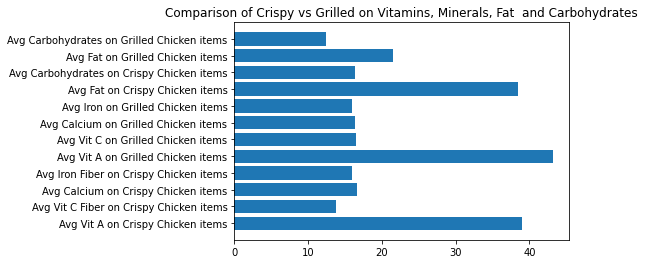

In [ ]:
# Get visual comparison of Crispy vs Grilled on Vitamins, Minerals, Fat  and Carbohydrates
plt.barh(['Avg Vit A on Crispy Chicken items', 'Avg Vit C Fiber on Crispy Chicken items',
          'Avg Calcium on Crispy Chicken items', 'Avg Iron Fiber on Crispy Chicken items',
          'Avg Vit A on Grilled Chicken items', 'Avg Vit C on Grilled Chicken items', 
          'Avg Calcium on Grilled Chicken items', 'Avg Iron on Grilled Chicken items',
          'Avg Fat on Crispy Chicken items','Avg Carbohydrates on Crispy Chicken items',
          'Avg Fat on Grilled Chicken items','Avg Carbohydrates on Grilled Chicken items'], 
         [avg_crispy_vita, avg_crispy_vitc, avg_crispy_calc, avg_crispy_iron, avg_grilled_vita, 
          avg_grilled_vitc, avg_grilled_calc, avg_grilled_iron, avg_crispy_fat, 
          avg_crispy_carb, avg_grilled_fat, avg_grilled_carb]) 
plt.title("Comparison of Crispy vs Grilled on Vitamins, Minerals, Fat  and Carbohydrates")

Yes, It does. Ordered Grilled Chicken instead of Crispy Chicken, increase a sandwich's nutritional value

Grilled Chicken Category has more nutritional values in terms of the average amount of Cholesterol, Dietary Fiber, Vitamin A & C, Iron, and Protein than menu items in Crispy Chicken Category

##**d. What about ordering egg whites instead of whole eggs?**

In [ ]:
# Compare the average amount of calories on both categories
# Average calories on Egg Whites Category
whites = df[df['Item'].str.contains('Egg White')]
avg_whites_cal = whites.Calories.mean()
print("Average calories on Egg Whites category is ", round(avg_whites_cal, 2), "Cal.")

# Average calories on Whole Egg Category
whole = df[df['Item'].str.contains('Egg')] 
avg_whole_cal = whole.Calories.mean()
print("Average calories on Whole Egg category is ", round(avg_whole_cal, 2), "Cal.")

Average calories on Egg Whites category is  565.38 Cal.
Average calories on Whole Egg category is  537.2 Cal.


In [ ]:
# Get visual comparison of Egg Whites and Whole Egg on calories
figsize=(10,5)
labels = ['Egg Whites Calories','Whole Egg Calories']
values = [avg_whites_cal, avg_whole_cal]

fig1 = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig1.update_layout(title_text="Comparison of Egg Whites and Whole Egg on calories")
fig1.show()

In [ ]:
# Compare the average amount of sodium and cholesterol on both categories
# Get the average of sodium and cholesterol amount in Egg Whites category
avg_whites_sod = round(whites.Sodium.mean(), 2)
avg_whites_ch = round(whites.Cholesterol.mean(), 2)
print("The average amount of sodium in Egg Whites category is ", avg_whites_sod, 
      "mg, while the average amount of cholesterol is ", avg_whites_ch, "mg.")

# Get the average of sodium and cholesterol amount in Whole Eggs category
avg_whole_sod = round(whole.Sodium.mean(), 2)
avg_whole_ch = round(whole.Cholesterol.mean(), 2)
print("The average amount of sodium in Whole Eggs category is ", avg_whole_sod, 
      "mg, while the average amount of cholesterol is ", avg_whole_ch, "mg.")

The average amount of sodium in Egg Whites category is  1433.85 mg, while the average amount of cholesterol is  41.54 mg.
The average amount of sodium in Whole Eggs category is  1336.0 mg, while the average amount of cholesterol is  150.0 mg.


In [ ]:
# Get visual comparison of Egg Whites and Whole Egg on sodium and cholesterol
figsize=(10,5)
labels = ['Egg Whites Sodium','Egg Whites Cholesterol', 'Whole Egg Sodium', 'Whole Egg Cholesterol']
values = [avg_whites_sod, avg_whites_ch, avg_whole_sod, avg_whole_ch]

fig2 = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig2.update_layout(title_text="Comparison of Egg Whites and Whole Egg on sodium and cholesterol")
fig2.show()

In [ ]:
# Compare the average amount of sugars, dietary fiber, and protein on both categories
# Get the average of sugars and dietary fiber amount in Egg Whites category
avg_whites_sug = round(whites.Sugars.mean(), 2)
avg_whites_df = round(whites['Dietary Fiber'].mean(), 2)
print("The average amount of sugars in Egg Whites category is ", avg_whites_sug, 
      "g, while the average amount of dietary fiber is ", avg_whites_df, "g.")

# Get the average of sodium and cholesterol amount in Grilled Chicken category
avg_whole_sug = round(whole.Sugars.mean(), 2)
avg_whole_df = round(whole['Dietary Fiber'].mean( ), 2)
print("The average amount of sugars in Whole Whites category is ", avg_whole_sug, 
      "g, while the average amount of dietary fiber is ", avg_whole_df, "g.")

# Get the average of Protein in whites egg category
white_fcp = pd.DataFrame({'Item': whites.Item, 'Protein': whites['Protein']})
avg_white_pro = round(white_fcp['Protein'].mean(), 2)
print("The average amount of  Protein respectively in White Egg category is", avg_white_pro, "g.")

# Get the average of Fat, Carbohydrates and Protein in Whole Egg category
whole_fcp = pd.DataFrame({'Item': whole.Item, 'Protein': whole['Protein']})
avg_whole_pro = round(whole_fcp['Protein'].mean(), 2)
print("The average amount of Fat, Carbohydrates and protein respectively in Whole Egg category is ", avg_whole_pro, "g.")

The average amount of sugars in Egg Whites category is  7.62 g, while the average amount of dietary fiber is  3.46 g.
The average amount of sugars in Whole Whites category is  6.64 g, while the average amount of dietary fiber is  3.16 g.
The average amount of  Protein respectively in White Egg category is 23.69 g.
The average amount of Fat, Carbohydrates and protein respectively in Whole Egg category is  22.92 g.


In [ ]:
# Get visual comparison of Egg Whites and Whole Egg on sugars, dietary fiber, and protein
figsize=(10,5)
labels = ['Egg Whites Sugars','Egg Whites Dietary Fiber', 'Whole Egg Sugars', 
          'Whole Egg Dietary Fiber','Egg Whites Protein','Whole Egg Protein']
values = [avg_whites_sug, avg_whites_df, avg_whole_sug, avg_whole_df,avg_white_pro, avg_whole_pro]

fig3 = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig3.update_layout(title_text="Comparison of Egg Whites and Whole Egg on sugars, dietary fiber, and protein")
fig3.show()

In [ ]:
# Compare the average amount of vitamins, minerals, Fat and Carbohydrates on both categories
# Get the average of vitamins and minerals in Egg Whites category
whites_vm = pd.DataFrame({'Item': whites.Item, 'Vit A': whites['Vitamin A (% Daily Value)'], 
                          'Vit C': whites['Vitamin C (% Daily Value)'], 'Calcium': whites['Calcium (% Daily Value)'], 
                          'Iron': whites['Iron (% Daily Value)']})
avg_whites_vita = round(whites_vm['Vit A'].mean(), 2)
avg_whites_vitc = round(whites_vm['Vit C'].mean(), 2)
avg_whites_calc = round(whites_vm['Calcium'].mean(), 2)
avg_whites_iron = round(whites_vm['Iron'].mean(), 2)
print("The average amount of Vit A, Vit C, Calcium, and Iron respectively in Egg Whites category is ", 
      avg_whites_vita, "%DV,", avg_whites_vitc, "%DV,", avg_whites_calc, "%DV, and", avg_whites_iron, "%DV.")

# Get the average of vitamins and minerals in Whole Eggs category
whole_vm = pd.DataFrame({'Item': whole.Item, 'Vit A': whole['Vitamin A (% Daily Value)'], 
                         'Vit C': whole['Vitamin C (% Daily Value)'], 'Calcium': whole['Calcium (% Daily Value)'], 
                         'Iron': whole['Iron (% Daily Value)']})
avg_whole_vita = round(whole_vm['Vit A'].mean(), 2)
avg_whole_vitc = round(whole_vm['Vit C'].mean(), 2)
avg_whole_calc = round(whole_vm['Calcium'].mean(), 2)
avg_whole_iron = round(whole_vm['Iron'].mean(), 2)
print("The average amount of Vit A, Vit C, Calcium, and Iron respectively in Whole Eggs category is ", 
      avg_whole_vita, "%DV,", avg_whole_vitc, "%DV,", avg_whole_calc, "%DV, and", avg_whole_iron, "%DV.")

# Get the average of Fat and Carbohydrates  in whites egg category
white_fcp = pd.DataFrame({'Item': whites.Item, 'Total Fat': whites['Total Fat (% Daily Value)'], 
                          'Carbohydrates': whites['Carbohydrates (% Daily Value)']})
avg_white_fat = round(white_fcp['Total Fat'].mean(), 2)
avg_white_carb = round(white_fcp['Carbohydrates'].mean(), 2)
print("The average amount of Fat and Carbohydrates respectively in White Egg category is ", 
      avg_white_fat, "%DV,", avg_white_carb, "%DV.")

# Get the average of Fat and Carbohydrates Whole Egg category
whole_fcp = pd.DataFrame({'Item': whole.Item, 'Total Fat': whole['Total Fat (% Daily Value)'], 
                          'Carbohydrates': whole['Carbohydrates (% Daily Value)']})
avg_whole_fat = round(whole_fcp['Total Fat'].mean(), 2)
avg_whole_carb = round(whole_fcp['Carbohydrates'].mean(), 2)
print("The average amount of Fat and Carbohydrates respectively in Whole Egg category is ", 
      avg_whole_fat, "%DV,", avg_whole_carb, "%DV.")

The average amount of Vit A, Vit C, Calcium, and Iron respectively in Egg Whites category is  3.54 %DV, 3.77 %DV, 17.0 %DV, and 15.23 %DV.
The average amount of Vit A, Vit C, Calcium, and Iron respectively in Whole Eggs category is  7.88 %DV, 3.92 %DV, 18.64 %DV, and 16.92 %DV.
The average amount of Fat and Carbohydrates respectively in White Egg category is  44.46 %DV, 17.62 %DV.
The average amount of Fat and Carbohydrates respectively in Whole Egg category is  44.04 %DV, 15.8 %DV.


In [ ]:
# Get visual comparison of Egg Whites and Whole Egg on vitamins, minerals, Fat and Carbohydrates
figsize=(10,5)
labels = ['Egg Whites Vit A','Egg Whites Vit C', 'Egg Whites Calcium','Egg Whites Iron',
          'Whole Egg Vit A', 'Whole Egg Vit C', 'Whole Egg Calcium', 'Whole Egg Iron', 
          'Egg Whites Fat','Egg Whites Carbohydrates','Whole Egg Fat', 'Whole Egg  Carbohydrates']
values = [avg_whites_vita, avg_whites_vitc, avg_whites_calc, avg_whites_iron,
          avg_whole_vita, avg_whole_vitc, avg_whole_calc, avg_whole_iron, avg_white_fat, 
          avg_white_carb, avg_whole_fat, avg_whole_carb]
          
fig4 = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig4.update_layout(title_text="Comparison of Egg Whites and Whole Egg on vitamins, minerals, Fat and Carbohydrates ")
fig4.show()

Ordered Egg Whites instead of whole egg, increase a nutritional value

Egg Whites Category has more nutritional values in terms of the average amount of Sugars, Dietary Fiber, Fat, Carbohydrates and Protein than menu items in While Egg Category

#**e. What is the least number of items could you order from the menu to meet one day's nutritional requirements?**

In [ ]:
nutrition = df[['Category','Item', 'Calories', 'Total Fat', 'Protein','Carbohydrates']]

Daily Calorie Intake is 2000

Daily Totalfat Intake 20% to 35%

Daily Protein Intake is 46 grams

Daily Carbohydates Intake is between 225 and 325 grams

In [ ]:
calories = input("Enter Calories: ")
totalfat = input("Enter Total Fat %: ")
#Because we generally want more protein in meals
protein = input("Enter Min Amount of Protein: ")
carbo = input("Enter Min Amount of Carbohydates: ")

Enter Calories: 2000
Enter Total Fat %: 35
Enter Min Amount of Protein: 46
Enter Min Amount of Carbohydates: 325


In [ ]:
filtered1 = nutrition[(nutrition['Calories'] < int(calories))]
filtered2 = nutrition[(nutrition['Total Fat'] < int(totalfat))]
filtered3 = nutrition[(nutrition['Protein'] < int(protein))]
filtered4 = nutrition[(nutrition['Carbohydrates'] < int(carbo))]
filtered1 = filtered1.sort_values('Calories', ascending=False)
filtered2 = filtered2.sort_values('Total Fat', ascending=False)
filtered3 = filtered3.sort_values('Protein', ascending=False)
filtered4 = filtered4.sort_values('Carbohydrates', ascending=False)
filtered1.head()

,Category,Item,Calories,Total Fat,Protein,Carbohydrates
82,Chicken & Fish,Chicken McNuggets (40 piece),1880,118.0,87,118
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),1150,60.0,36,116
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),1090,56.0,36,111
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,1050,50.0,35,115
33,Breakfast,Big Breakfast with Hotcakes and Egg Whites (Re...,990,46.0,35,110


In [ ]:
filtered2.head()

,Category,Item,Calories,Total Fat,Protein,Carbohydrates
12,Breakfast,Sausage Biscuit with Egg (Regular Biscuit),510,33.0,18,36
253,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),930,33.0,20,139
59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,670,33.0,36,58
74,Chicken & Fish,Premium McWrap Southwest Chicken (Crispy Chicken),670,33.0,27,68
18,Breakfast,Steak & Egg Biscuit (Regular Biscuit),540,32.0,25,38


In [ ]:
filtered3.head()

,Category,Item,Calories,Total Fat,Protein,Carbohydrates
81,Chicken & Fish,Chicken McNuggets (20 piece),940,59.0,44,59
64,Chicken & Fish,Bacon Clubhouse Grilled Chicken Sandwich,590,25.0,40,51
60,Chicken & Fish,Premium Grilled Chicken Club Sandwich,510,20.0,40,44
51,Beef & Pork,Bacon Clubhouse Burger,720,40.0,39,51
44,Beef & Pork,Quarter Pounder with Bacon & Cheese,600,29.0,37,48


In [ ]:
filtered4.head()

,Category,Item,Calories,Total Fat,Protein,Carbohydrates
249,Smoothies & Shakes,Chocolate Shake (Large),850,23.0,19,141
246,Smoothies & Shakes,Strawberry Shake (Large),850,24.0,18,140
253,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),930,33.0,20,139
243,Smoothies & Shakes,Vanilla Shake (Large),820,23.0,18,135
251,Smoothies & Shakes,Shamrock Shake (Large),820,23.0,18,135
